### Basic Supervised Learning Algorithms: Linear Regression
---

<img src="./images/Supervised.png" width='70%'/>

In [7]:
#!jt -t solarizedl
!jt -t grade3

In [1]:
## Import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.linear_model import LinearRegression,
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler,


%matplotlib inline

np.random.seed(100)

In [2]:
# Housing Price Examples from last class
carpet_area = np.array([850, 1200, 1500,1475, 900, 2100,2700, 800, 1100,1650, 2600, 1800, 1000, 1300])
house_price = np.array([190, 250, 300,310, 200, 350, 410, 170, 210, 329, 400, 360, 230, 260])

# A dictionary of carpet area and house_price
data={"carpet_area": carpet_area, "house_price":house_price}

#A Dataframe having house price vs the carpet area
house_price_df = pd.DataFrame(data)

In [4]:
# One more feature to the housing price data
house_type = pd.Series(["condo","house","house","condo","house", "condo","condo","house","house","condo","house"])
house_price_df['house_type'] = house_type

In [5]:
house_price_df.head()

,carpet_area,house_price,house_type
0,850,190,condo
1,1200,250,house
2,1500,300,house
3,1475,310,condo
4,900,200,house


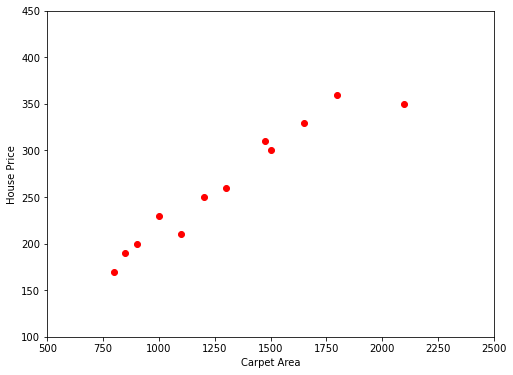

In [6]:
# Plot of the points: Scatter-plot
plt.figure(figsize=(8,6))
plt.plot(carpet_area, house_price, 'ro')# 'ro' red circle
plt.axis([500, 2500, 100, 450]) # x-range and y-range
plt.xlabel("Carpet Area")
plt.ylabel("House Price")
plt.show()

### Observation
<li>Above plot suggests a linear relation between house price and carpet area.</li>
<li>How can we find a linear function that predicts the house price given the carpet area.</li>
<li>REGRESSION ANALYSIS Provides the answer.</li>
<li>If $x$ denotes the carpet area and $y$ denotes the price of the house. We aim to find a linear function: </li>
$$ y = h_{\theta} (x)  = \theta_0 + \theta_1 x $$


### Linear Regression
<li>Hypothesis: </li>
$$ y = h_{\theta} (x)  = \theta_0 + \theta_1 x $$
<li>Objective: To estimate the values of the parameters $\theta = (\theta_0, \theta_1)$.</li>
<li>Minimize the cost function (mean squared error(/2)):</li>
$$ J(\theta) = \frac{1}{2 m} \sum_{i=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2$$
<li>How: Gradient Descent:</li>
<li>Start with random $\theta_0$ and $\theta_1$, and repeat until convergence:</li>
<div class='eqnbox2'>
$$ \large
\theta_0 = \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}, \qquad
 \theta_1 = \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}  
 $$
</div>

where $\alpha$ is called the 'learning rate' and 

\begin{align}
  \frac{\partial J}{\partial \theta_0} &=  \frac{1}{m} \sum_{i=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)}),\\
 \frac{\partial J}{\partial \theta_1}  &=  \frac{1}{m} \sum_{i=1}^{m} (\theta_0 + \theta_1 x^{(i)} - y^{(i)})x^{(i)}.
\end{align}

**QUESTION**: How should we choose an appropriate learning rate and why?

In [14]:
class LinRegModel_v1:    
    def __init__(self, theta0=0.0, theta1=0.0):
        self.theta0 = theta0
        self.theta1 = theta1
        self.mse=[]
        print ("Linear Regression Object Created.")
        print ("theta0=%.2f and theta1 = %.2f"%(self.theta0, self.theta1))
        
    def train(self, X, y, learning_rate = 0.001, n_iter=1000, verbose=False):
        '''
        Trains a univariate linear regression model to estimate parameters.
        ---------------------
        Pramaters:
        X is the feature vector
        y is the response vaector
        ---------------------
        Returns: None
        '''
        m = len(y)
        # print m
        t0 = self.theta0
        t1 = self.theta1
        ## Gradient Descent
        for k in range(n_iter):
            dt0 = np.sum(t0 + t1 * X - y) / m
            dt1 = np.sum((t0 + t1 * X - y) * X) / m
            
            ## Gradient Descent
            t0 = t0 - learning_rate * dt0
            t1 = t1 - learning_rate * dt1
            
            if k % 10 == 0:
                err = (np.linalg.norm(t0 + t1 * X - y))**2 / m
                self.mse.append(err)
                if verbose:
                    print( "\n Iteration %d: MSE = %.5f"%(k, err))
                
        self.intercept_ = t0
        self.coef_ = t1
        print (" The  model is done training. Ready with prediction power.")
        
        
    
    def predict(self, x):
        return self.intercept_ + self.coef_ * x
        

In [8]:
# Create an object of the Linear Regression class
myo1 = LinRegModel_v1(theta0=0.25, theta1=0.4)

Linear Regression Object Created.
theta0=0.25 and theta1 = 0.40


In [9]:
# y = x+1
x_dummy = np.array([1, 2, 3, 4, 5]);
y_dummy = np.array([2.1,2.9,4.2, 4.9, 5.8])

myo1.train(x_dummy,y_dummy , learning_rate=.001, n_iter=2000, verbose=True)


 Iteration 0: MSE = 5.46359

 Iteration 100: MSE = 0.07891

 Iteration 200: MSE = 0.06039

 Iteration 300: MSE = 0.04719

 Iteration 400: MSE = 0.03777

 Iteration 500: MSE = 0.03106

 Iteration 600: MSE = 0.02628

 Iteration 700: MSE = 0.02287

 Iteration 800: MSE = 0.02044

 Iteration 900: MSE = 0.01870

 Iteration 1000: MSE = 0.01747

 Iteration 1100: MSE = 0.01659

 Iteration 1200: MSE = 0.01596

 Iteration 1300: MSE = 0.01551

 Iteration 1400: MSE = 0.01519

 Iteration 1500: MSE = 0.01497

 Iteration 1600: MSE = 0.01480

 Iteration 1700: MSE = 0.01469

 Iteration 1800: MSE = 0.01460

 Iteration 1900: MSE = 0.01455
 The  model is done training. Ready with prediction power.


In [10]:
print ("Intercept = {}, coeff = {}".format(myo1.intercept_, myo1.coef_))

Intercept = 1.136045893902436, coeff = 0.9466349032836988


In [11]:
myo1.predict(2.5)

3.5026331521116827

In [12]:
myo2 = LinRegModel_v1(theta0 = 0.0, theta1 =0.0)

Linear Regression Object Created.
theta0=0.00 and theta1 = 0.00


In [15]:
myo2.train(1.0* carpet_area, 1.0 * house_price, learning_rate=0.00001, n_iter=50, verbose=True)


 Iteration 0: MSE = 52664135.98847
 The  model is done training. Ready with prediction power.


In [16]:
myo2.predict(1000.0)

-1.3446603390961125e+72

In [19]:
# UNDERSTAND THE IMPORTANCE OF STANDARDIZATION and NORMALIZATION
class Standardizer:
    def __init__(self):
        self.mean = 0
        self.std=0
        print ("Standardizer object created")
    
    def fit(self, X):        
        # Find the mean of every column
        self.mean = np.mean(X, axis=0)

        # Find the standard deviation of every column/feature
        self.std = np.std(X,axis=0)
    
    def transform(self, X):        
        # Standard Scaling
        return (X - self.mean)/self.std

In [21]:
# Crate the object for standardScaling
scaler = Standardizer()

Standardizer object created


In [22]:
scaler.fit(1.0*carpet_area)

In [23]:
carpet_area_n = scaler.transform(carpet_area)
print (carpet_area_n)

[-1.09172562 -0.50225394  0.00300751 -0.03909761 -1.00751538  1.0135304
  2.02405328 -1.17593586 -0.67067442  0.25563823  1.8556328   0.50826895
 -0.8390949  -0.33383345]


In [24]:
myo3 = LinRegModel_v1()

Linear Regression Object Created.
theta0=0.00 and theta1 = 0.00


In [25]:
myo3.train(carpet_area_n, house_price/1000.0, learning_rate=0.001, n_iter=5000, verbose=True)


 Iteration 0: MSE = 0.08602

 Iteration 10: MSE = 0.08432

 Iteration 20: MSE = 0.08266

 Iteration 30: MSE = 0.08103

 Iteration 40: MSE = 0.07943

 Iteration 50: MSE = 0.07787

 Iteration 60: MSE = 0.07633

 Iteration 70: MSE = 0.07483

 Iteration 80: MSE = 0.07336

 Iteration 90: MSE = 0.07191

 Iteration 100: MSE = 0.07050

 Iteration 110: MSE = 0.06911

 Iteration 120: MSE = 0.06775

 Iteration 130: MSE = 0.06641

 Iteration 140: MSE = 0.06511

 Iteration 150: MSE = 0.06382

 Iteration 160: MSE = 0.06257

 Iteration 170: MSE = 0.06134

 Iteration 180: MSE = 0.06013

 Iteration 190: MSE = 0.05895

 Iteration 200: MSE = 0.05779

 Iteration 210: MSE = 0.05665

 Iteration 220: MSE = 0.05554

 Iteration 230: MSE = 0.05445

 Iteration 240: MSE = 0.05338

 Iteration 250: MSE = 0.05233

 Iteration 260: MSE = 0.05130

 Iteration 270: MSE = 0.05029

 Iteration 280: MSE = 0.04930

 Iteration 290: MSE = 0.04834

 Iteration 300: MSE = 0.04739

 Iteration 310: MSE = 0.04646

 Iteration 320: MS

In [26]:
# Predict the price of the house with carpet area 1400
myo3.predict(scaler.transform(1400))*1000

269.5339083080346

/var/folders/j8/n1k26lsx2b5__nzr4pr131xr0000gn/T/ipykernel_66291/1720397746.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(carpet_area, myo3.predict(scaler.transform(carpet_area))*1000, 'g-', linestyle='solid')# 'ro' red circle


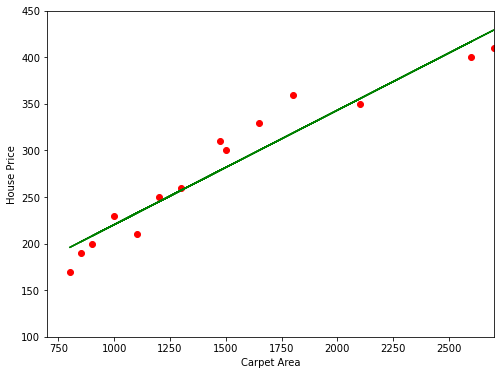

In [24]:
# Plot of the points
plt.figure(figsize=(8,6))
plt.plot(carpet_area, house_price, 'ro')# 'ro' red circle
plt.plot(carpet_area, myo3.predict(scaler.transform(carpet_area))*1000, 'g-', linestyle='solid')# 'ro' red circle
plt.axis([700, 2700, 100, 450]) # x-range and y-range
plt.xlabel("Carpet Area")
plt.ylabel("House Price")
plt.show()

In [27]:
# Create linear regression object from Scikit_learn
lin_reg = LinearRegression()

In [28]:
# TRAIN: once the data is reshaped, running the fit is simple
lin_reg.fit(carpet_area.reshape(-1,1), house_price.reshape(-1,1))

LinearRegression()

/var/folders/j8/n1k26lsx2b5__nzr4pr131xr0000gn/T/ipykernel_66291/927472254.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(carpet_area,lin_reg.predict(carpet_area.reshape(-1,1)), 'g-', linestyle='solid')# 'ro' red circle


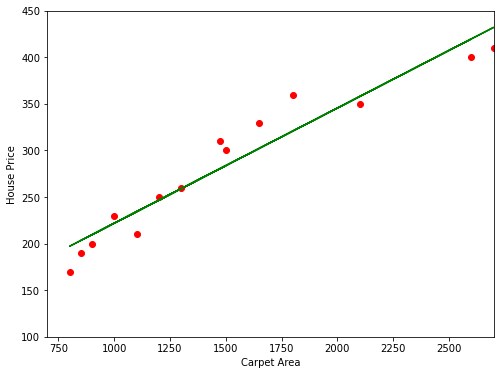

In [27]:
# Plot of the points
plt.figure(figsize=(8,6))
plt.plot(carpet_area, house_price, 'ro')# 'ro' red circle
plt.plot(carpet_area,lin_reg.predict(carpet_area.reshape(-1,1)), 'g-', linestyle='solid')# 'ro' red circle
plt.axis([700, 2700, 100, 450]) # x-range and y-range
plt.xlabel("Carpet Area")
plt.ylabel("House Price")
plt.show()

### A word of caution

<img src="https://informatique-python.readthedocs.io/fr/latest/_images/anscombe.png" width="80%">

[Image Source](https://informatique-python.readthedocs.io/fr/latest/_images/anscombe.png)

> "The data sets in the Anscombe's quartet are designed to have approximately the same linear regression line (as well as nearly identical means, standard deviations, and correlations) but are graphically very different. This illustrates the pitfalls of relying solely on a fitted model to understand the relationship between variables."--WikiPedia

### Multiple Linear Regression
---
Please see [WikiPedia] for details on this approach.

<img src="./images/LinReg1.png" width='70%'/>

Assume following linear relationship between the predictor variables (features) and the response variable
$$
y_i = \beta_{0} + \beta_{1} x_{i1} + \cdots + \beta_{n} x_{in} + \varepsilon_i
 = \mathbf{x}^\mathsf{T}_i\boldsymbol\beta + \varepsilon_i,
 \qquad i = 1, \ldots, m,
 $$
 which converted to its vectorized form becomes
 $$
 \mathbf{y} = X\boldsymbol\beta + \boldsymbol\varepsilon, \,
 $$
 where
 $$
 \mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{pmatrix}, \qquad
 X = \begin{pmatrix} \mathbf{x}^\mathsf{T}_1 \\ \mathbf{x}^\mathsf{T}_2 \\ \vdots \\ \mathbf{x}^\mathsf{T}_m \end{pmatrix}
 = \begin{pmatrix} 1 &  x_{11} & \cdots & x_{1n} \\
 1 & x_{21} & \cdots & x_{2n} \\
 \vdots & \vdots & \ddots & \vdots \\
 1 & x_{n1} & \cdots & x_{nn}
 \end{pmatrix},\qquad
 \boldsymbol\beta = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_n \end{pmatrix}, \quad
 \boldsymbol\varepsilon = \begin{pmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_m \end{pmatrix}.
 $$

Parameter Estimation:
$$
{\hat{\beta}} =  \textrm{arg min}\,J({\beta}) = \textrm{arg min} \frac{1}{2 m}  \sum_{i=1}^{m} ({\beta} \, . \, {x_{i}} - y_i)^2
$$
Cost function in vectorized form
\begin{align}
J({\beta})&=\frac{1}{2 m}  ||X {\beta} - Y||^2 \\ 
&= \frac{1}{2 m}  (X{\beta} - Y)^T (X {\beta} - Y) \\
&= \frac{1}{2 m} \left({\beta}^{T}X^TX {\beta} - Y^{T}X{\beta}- {\beta}^{T}X^TY + Y^{T}Y\right)
\end{align}

The gradient of the cost function:
\begin{align}
\nabla_{\beta} J(\beta) = \frac{1}{2 m} ( 2 X^T X {\beta} -2X^TY  )
\end{align}
We can find the stationary point of $J(\beta)$ by solving a linear system as
$$
2 X^T X {\beta} -2X^TY  = 0 \Rightarrow {\hat{\beta}} = (X^TX)^{-1}X^TY
$$

But for practical considerations, we use iterative algorithms such a gradient descent method.
#### Gradient Descent Method
>- Pickup appropriate (random) initialization of $\beta$. Choose appropriate learning rate $\alpha$ (=0.001, for example.)

>- Repeat the following update until convergence ($|\Delta J(\beta)|<\epsilon$)
    >- $$ \beta \leftarrow \beta - \alpha \nabla_{\beta} J(\beta).$$

<div class="alert alert-info">
Note that the gradient descent method (with normalization) could be interpreted as a preconditioned iterative method for  solving the normal equation $$  X^T X {\beta}  =X^TY.$$
</div>

<br>

### **Example 2:** Combined cycle power plant energy output

<img src="https://insights.globalspec.com/images/assets/895/2895/CCNG-fullsize.png" width="70%">


In [29]:
# Combined Cycle Power Plant Data at UCI downloaded on instructor's computer and unzipped
'''The dataset contains 9568 data points collected from a Combined Cycle Power Plant
over 6 years (2006-2011), when the power plant was set to work with full load.
Features consist of hourly average ambient variables Temperature (T), 
Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) 
to predict the net hourly electrical energy output (EP)  of the plant.
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
'''
ccpp = pd.read_excel("./CCPower.xlsx") # NOTE: how to read excel file

In [30]:
# Explore data: First few rows
ccpp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


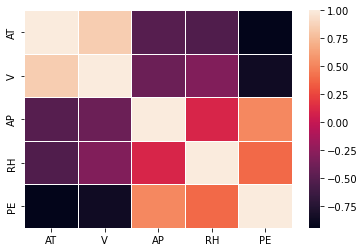

In [31]:
#ccpp.corr()
import seaborn as sns
ax = sns.heatmap(ccpp.corr(), linewidths=.5)


In [32]:
#Step[0] Bring the data in a matrix
data_mat = ccpp.values
print (data_mat.shape)

(9568, 5)


In [33]:
#Step[1] Split Data into Train and Test subsets: WHY?
X = data_mat[:,0:4]
y = data_mat[:,4]
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=100)

In [34]:
#Step[2] Preprocess: Normalize the Features
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_n = scaler.transform(X_train) # Is built on training data
X_test_n = scaler.transform(X_test) # Same normalizer used for test dataa too

In [35]:
# Create Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [36]:
# TRAIN THE MODEL
lr.fit(X_train_n, y_train)

LinearRegression()

In [37]:
# WHAT ARE THESE COEFFICIENTS and INTERCEPTS?
print (lr.coef_)
print (lr.intercept_)

[-70.0974413  -12.60164797   2.28413587 -11.83693075]
502.90002808385645


In [38]:
# Predict on some new values of x
y_pred = lr.predict(X_test_n)
print (np.round(y_pred[1:6],2))
print (y_test[1:6])

[474.93 478.36 482.71 452.44 445.26]
[478.82 473.57 481.49 453.22 442.08]


#### Scatter plot of actual $y$ values and predicted $y$ values
Closer the scatter plot is to the line $y_{pred} = y_{actual}$, better the fit.

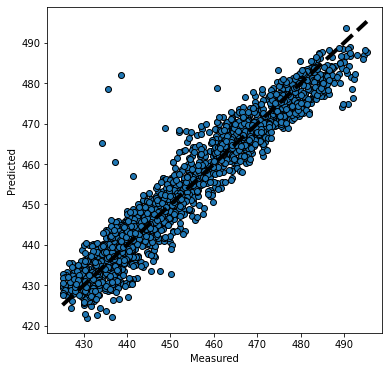

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### How to measure if the fit is good or not?
#### $R^2$: Coefficient of Determination
<hr>

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/600px-Coefficient_of_Determination.svg.png" width="400px" />
Image Source: WikiPedia
$$R^2 =  1 - \frac{\textrm{SS}_{res}}{ \textrm{SS}_{tot}}= 1 - \frac{\sum (y_i - f_i)^2}{\sum (y_i - \bar{y})^2}$$
<li>$R^2 \leq 1$.</li>
<li>Closer $R^2$ is to 1.0, better the fit (generally).</li>

**Question** True/False: $R^2$ is always positive.

[The relationship between r and R^2](http://danshiebler.com/2017-06-25-metrics/)

In [40]:
# R^2 : Coefficient of determination. Goodness of fit
print ("R-squared for the training data: ",lr.score(X_train_n, y_train))
print ("R-squared for the test data: ",lr.score(X_test_n, y_test))

R-squared for the training data:  0.930592713707226
R-squared for the test data:  0.9212053893462191


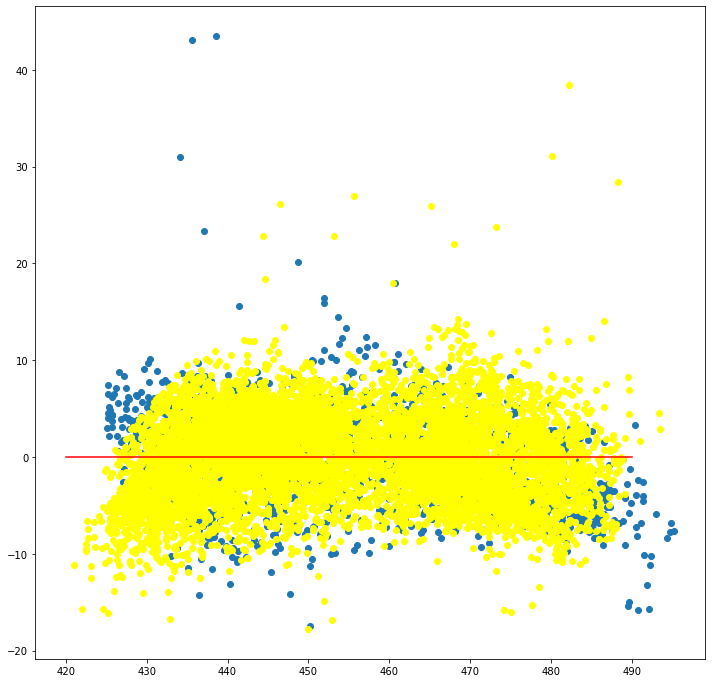

In [41]:
#Predicted vs. errors plot -> demonstrates an issue with this fit (high bias)
plt.figure(figsize=(12,12))
#plt.scatter(lr.predict(X_test_n), lr.predict(X_test_n)-y_test)
plt.scatter(y_test, lr.predict(X_test_n)-y_test)
plt.plot([420,490],[0,0], color = "red")

#place testing data on the plot as well
plt.scatter(lr.predict(X_train_n), lr.predict(X_train_n)-y_train, color = "yellow")

### Regularization
---

#### A discussion on polynomial Regression

Continued on the iPad. See the note after class on Canvas.

---
MUST Read the blog:https://www.learnopencv.com/bias-variance-tradeoff-in-machine-learning/
<li>Capacity, underfitting, and overfitting</li>
<li>Bias, variance, and bias-variance trade-off</li>

<img width="80%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Bias_and_variance_contributing_to_total_error.svg/1920px-Bias_and_variance_contributing_to_total_error.svg.png" >

[Image Source](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Bias_and_variance_contributing_to_total_error.svg/1920px-Bias_and_variance_contributing_to_total_error.svg.png)
---
Any modification to the learning algorithm that is intended to reduce generalization error but not the training error is called regularization.
<hr>
Ridge Regression:$$ J(\theta) = \frac{1}{2 m} \| X \theta - y\|^2 + \lambda \| \theta \|^2 $$ 
<hr>
Lasso Regression:$$ J(\theta) = \frac{1}{2 m} \| X \theta - y\|^2 + \lambda \sum_{i=1}^n| \theta_i | $$ 
The parameter $\lambda$ is called a penalty. It is a hyperparameter that needs to be determined experimentally by cross-validation.

(LASSO: Least absolute shrinkage and selection operation)

#### Assignment : Auto-mileage data from UCI

###### Steps to follow:
***
-  Get feature matrix X, and target variable y
-  Split data into training and testing
-  Normalize data using MinMaxScaler
-  Creat a LinearRegression object for modeling
-  Train the model with training data
-  Look at R^2 score for goodness of fit for the train and test data.
-  Improve your model.

In [25]:
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
col_names = ['mpg', 'cylinders', 'displacement', 
             'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name']
mileage = pd.read_csv(url2, delim_whitespace=True, names=col_names)
mileage.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [26]:
from sklearn.datasets import fetch_california_housing
cal_data = fetch_california_housing()
type(cal_data)

sklearn.utils.Bunch

In [28]:
print (cal_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [29]:
X = cal_data.data
y = cal_data.target
print( X.shape)
print (y.shape)
#print cal_data.DESCR

(20640, 8)
(20640,)


In [30]:
# Split Data into Train and Test subsets: WHY?
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=100)

In [31]:
# Preprocess: Normalize the Features
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_n = normalizer.transform(X_train) # Is built on training data
X_test_n = normalizer.transform(X_test) # Same normalizer used for test dataa too

In [32]:
# Create a Linear Regression Model
linreg = LinearRegression()
# TRAIN THE MODEL
linreg.fit(X_train_n, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Predict on test data
y_test_pred = linreg.predict(X_test_n)
print (y_test_pred[1:5])
print( y_test[1:5])

[1.58841091 2.09217436 1.59135244 2.04970556]
[1.042 1.462 1.542 3.242]


In [34]:
# R^2 : Coefficient of determination. Goodness of fit
print (linreg.score(X_train_n, y_train))
print (linreg.score(X_test_n, y_test))

0.5992766703138874
0.6221318111480796


In [35]:
# Create an object of  The Polynomial Feature class
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [37]:
Xp = poly.fit_transform(X)
print (Xp.shape) # Dimension of new feature matrix
print (Xp[0])

(20640, 44)
[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
  3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02
  6.93089550e+01  3.41333200e+02  5.81442540e+01  8.52341905e+00
  2.68071440e+03  2.12755111e+01  3.15358576e+02 -1.01758920e+03
  1.68100000e+03  2.86349206e+02  4.19761905e+01  1.32020000e+04
  1.04777778e+02  1.55308000e+03 -5.01143000e+03  4.87780297e+01
  7.15041572e+00  2.24888889e+03  1.78483245e+01  2.64558730e+02
 -8.53669841e+02  1.04818594e+00  3.29666667e+02  2.61640212e+00
  3.87819048e+01 -1.25140238e+02  1.03684000e+05  8.22888889e+02
  1.21973600e+04 -3.93580600e+04  6.53086420e+00  9.68044444e+01
 -3.12365556e+02  1.43489440e+03 -4.63007240e+03  1.49401729e+04]


In [38]:
# Split Data into Train and Test subsets: WHY?
Xp_train, Xp_test, y_train, y_test  = train_test_split(Xp, y, test_size=0.25, random_state=10)

In [39]:
# Preprocess: Normalize the Features
normalizer = MinMaxScaler()
normalizer.fit(Xp_train)
Xpn_train = normalizer.transform(Xp_train) # Is built on training data
Xpn_test = normalizer.transform(Xp_test) # Same normalizer used for test dataa too

In [40]:
# Create a Linear Regression Model
from  sklearn.linear_model import LassoCV
linreg = LassoCV(alphas=[  0.01, 0.05, 1.0, 5, 10, 100], max_iter=10000, tol=0.00001)
#linreg = linear_model.RidgeCV(alphas=[0.001, 0.01, 0.05, 1.0, 5, 10, 100])
# TRAIN THE MODEL
#linreg = linear_model.LinearRegression()
linreg.fit(Xpn_train, y_train)

LassoCV(alphas=[0.01, 0.05, 1.0, 5, 10, 100], copy_X=True, cv=None, eps=0.001,
        fit_intercept=True, max_iter=10000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=1e-05, verbose=False)

In [41]:
# R^2 : Coefficient of determination. Goodness of fit
print( linreg.score(Xpn_train, y_train))
print (linreg.score(Xpn_test, y_test))

0.5523189423935163
0.5510412173826831


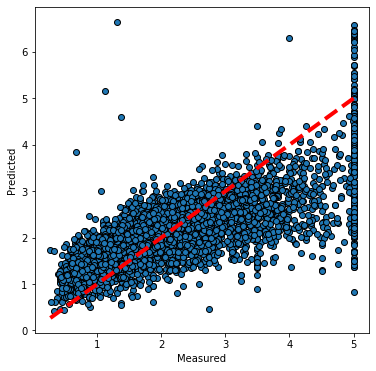

In [42]:
y_pred = linreg.predict(Xpn_test)
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**Question**: What is wrong in the model that we have created?

In [1]:
%%html
<style>
.eqnbox{
    margin:auto;width:500px;padding:20px;
    border: 3px solid green; border-radius:15px;margin-top:20px;margin-bottom:20px;
}
.eqnbox2{
    margin:auto;width:500px;padding:20px;
    border: 1px solid green; border-radius:15px;margin-top:20px;margin-bottom:20px;
}
.eqnbox3{
    margin:auto;width:700px;padding:20px;background-color:#c6d6b4;
    border: 1px solid green; border-radius:15px;margin-top:20px;margin-bottom:20px;
}
</style>

In [1]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl
